In [7]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [8]:
ls

3D.ipynb              PCA.ipynb
PCA.csv               Universities (1).csv


In [9]:
uni = pd.read_csv("Universities (1).csv")

uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [10]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head()
# Converting into numpy array
UNI = uni.data.values
UNI

<ipython-input-10-3aa59f77e3d8>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  uni.data = uni.iloc[:,1:]


array([[ 1310,    89,    22,    13, 22704,    94],
       [ 1415,   100,    25,     6, 63575,    81],
       [ 1260,    62,    59,     9, 25026,    72],
       [ 1310,    76,    24,    12, 31510,    88],
       [ 1280,    83,    33,    13, 21864,    90],
       [ 1340,    89,    23,    10, 32162,    95],
       [ 1315,    90,    30,    12, 31585,    95],
       [ 1255,    74,    24,    12, 20126,    92],
       [ 1400,    91,    14,    11, 39525,    97],
       [ 1305,    75,    44,     7, 58691,    87],
       [ 1380,    94,    30,    10, 34870,    91],
       [ 1260,    85,    39,    11, 28052,    89],
       [ 1255,    81,    42,    13, 15122,    94],
       [ 1081,    38,    54,    18, 10185,    80],
       [ 1375,    91,    14,     8, 30220,    95],
       [ 1005,    28,    90,    19,  9066,    69],
       [ 1360,    90,    20,    12, 36450,    93],
       [ 1075,    49,    67,    25,  8704,    67],
       [ 1240,    95,    40,    17, 15140,    78],
       [ 1290,    75,    50,   

In [11]:
# Normalizing the numerical data 
uni_normal = scale(UNI)

In [12]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [13]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [14]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

<BarContainer object of 6 artists>

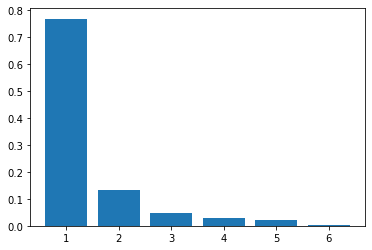

In [15]:
plt.bar(range(1,len(var)+1),var)

In [11]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [12]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

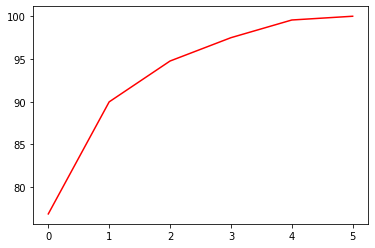

In [13]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [12]:
UNI.shape

(25, 6)

In [18]:
pca_values.shape

(25, 6)

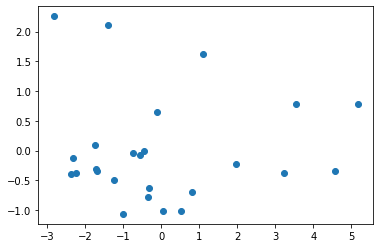

In [19]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [19]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), uni[['Univ']]], axis = 1)

In [20]:
finalDf

,pc1,pc2,Univ
0,-1.009874,-1.064310,Brown
1,-2.822238,2.259045,CalTech
2,1.112466,1.631209,CMU
3,-0.741741,-0.042187,Columbia
4,-0.311912,-0.635244,Cornell
5,-1.696691,-0.344363,Dartmouth
6,-1.246821,-0.490984,Duke
7,-0.338750,-0.785169,Georgetown
8,-2.374150,-0.386539,Harvard
9,-1.403277,2.119515,JohnsHopkins


In [23]:
uni_normal[:2,:]

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351]])

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

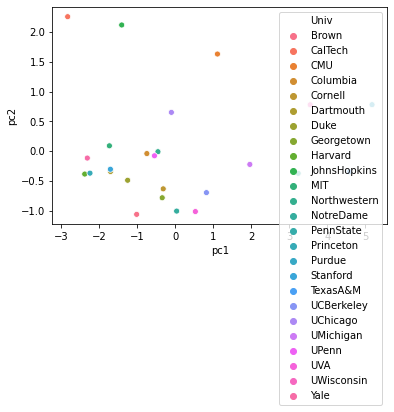

In [29]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')

# iris data 

In [16]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [17]:
data=sns.load_dataset("iris")

In [18]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
pca = PCA()
pca_values = pca.fit_transform(data.iloc[:,:4])

In [21]:
pca_values.shape

(150, 4)

<BarContainer object of 4 artists>

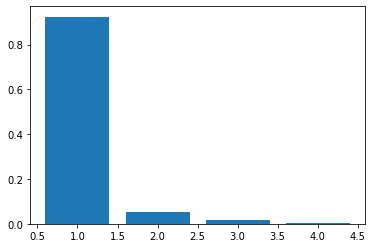

In [22]:
var = pca.explained_variance_ratio_
var
plt.bar(range(1,len(var)+1),var)

In [23]:
var

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [24]:
iris_pca=pd.DataFrame(columns=["pc1","pc2","class"])

In [25]:
iris_pca["pc1"]=pca_values[:,0]
iris_pca["pc2"]=pca_values[:,1]
iris_pca["class"]=data["species"]

In [44]:
iris_pca["class"]=iris_pca["class"].map({"setosa":0,"versicolor":1,"virginica":2})

In [45]:
iris_pca["class"].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [26]:
iris_pca

,pc1,pc2,class
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
x_train,x_test,y_train,y_test=train_test_split(iris_pca.iloc[:,:-2],iris_pca.iloc[:,-1],test_size=0.2,shuffle=True)

In [38]:
x_test

,pc1
40,-2.770102
70,1.116283
24,-2.355754
39,-2.590006
67,0.236105
56,1.095061
25,-2.506669
138,1.169326
98,-0.906470
64,-0.173925


In [39]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_test_pred=model.predict(x_test)

In [41]:
accuracy_score(y_test,y_test_pred)

0.9333333333333333

In [42]:
import  matplotlib.pyplot  as plt

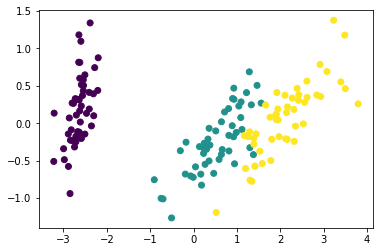

In [50]:
plt.scatter(iris_pca.iloc[:,0],iris_pca.iloc[:,1],c=iris_pca.iloc[:,-1])